__Make relative abundance figures among all taxonomic levels (phyla to genera) and calculate the percentage of each phylum.__

1. The figures showed express most of the bacteria (4 phyla at least on the level of phylum)<br>
2. The unmentioned bacteria(unubundance bacteria) should be expressed as "others"<br>
3. The axis of the plot is percentage axis <br>
4. Calculate the the percentage value for each phylum (if percentage can be calculated for each bacteria that been mentioned in the figures that will be great).<br>
5. Do this task for 2 groups(healthy, patient ) and 4 subgroups (healthy subgroups, patient subgroups)<br>

Groups: healthy and HBV patients

Subgroups: healthy khat chewers, Non khat healthy, Khat-chewing HBV patients, Non khat patients

In [1]:
import os  # Operating system-related functions
import numpy as np  # Numerical Python for array operations
import pandas as pd  # Data manipulation and analysis library
%matplotlib notebook
import matplotlib.pyplot as plt  # Data visualization library

In [2]:
## Read Data

group_df = pd.read_excel("groups.xlsx", engine="openpyxl")
subgroup_df = pd.read_excel("subgroups.xlsx", engine="openpyxl")
taxonomy_df = pd.read_excel("Taxonomy table.xlsx", engine="openpyxl")
# Rename the column name
taxonomy_df.rename(columns={'Feature ID': '#OTU ID'}, inplace=True)

In [3]:
group_df

,#OTU ID,healthy,HBV_patients
0,439b84fae2fa4aef5a53af98bfdb6f07,0,165
1,1bb6c789a99cac2f7b0b3cb3e941e0cb,0,158
2,c55dc26124bd3d4c33cd323ad815bd76,142,0
3,a15b0f42ef594340dc2356b15ea6e526,141,0
4,693fb69ac5215f82ba6bb4bf87b7848e,138,0
...,...,...,...
438,244fec42fae075387b3ff5ff1286b965,0,2
439,93d3ea702ce1d9ff963c4dfbfc9582b6,2,0
440,e0aa9ec4eaef6cdb63ad60f4e58b0ab5,0,2
441,11b845b5b2b2a59f047ae346a651754c,0,2


In [4]:
subgroup_df

,#OTU ID,healthy_khat_chewers,healthy_non_khat,khat_chewing_HBV_patients,non_khat_HBV_patients
0,439b84fae2fa4aef5a53af98bfdb6f07,0,0,55,110
1,1bb6c789a99cac2f7b0b3cb3e941e0cb,0,0,115,43
2,c55dc26124bd3d4c33cd323ad815bd76,142,0,0,0
3,a15b0f42ef594340dc2356b15ea6e526,34,107,0,0
4,693fb69ac5215f82ba6bb4bf87b7848e,22,116,0,0
...,...,...,...,...,...
438,244fec42fae075387b3ff5ff1286b965,0,0,0,2
439,93d3ea702ce1d9ff963c4dfbfc9582b6,2,0,0,0
440,e0aa9ec4eaef6cdb63ad60f4e58b0ab5,0,0,2,0
441,11b845b5b2b2a59f047ae346a651754c,0,0,2,0


In [5]:
taxonomy_df

,#OTU ID,Taxon,Confidence
0,439b84fae2fa4aef5a53af98bfdb6f07,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.999999
1,1bb6c789a99cac2f7b0b3cb3e941e0cb,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.999999
2,c55dc26124bd3d4c33cd323ad815bd76,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.792338
3,a15b0f42ef594340dc2356b15ea6e526,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,1.000000
4,693fb69ac5215f82ba6bb4bf87b7848e,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,1.000000
...,...,...,...
438,244fec42fae075387b3ff5ff1286b965,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,0.997196
439,93d3ea702ce1d9ff963c4dfbfc9582b6,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.732886
440,e0aa9ec4eaef6cdb63ad60f4e58b0ab5,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.985747
441,11b845b5b2b2a59f047ae346a651754c,D_0__Bacteria;D_1__Proteobacteria;D_2__Deltapr...,0.850582


In [6]:
## Merge group_df, subgroup_df and taxonomy_df to all_df

grp_and_subgrp_df = group_df.merge(subgroup_df, on='#OTU ID', how='inner')
all_df = grp_and_subgrp_df.merge(taxonomy_df, on='#OTU ID', how='inner')
all_df

,#OTU ID,healthy,HBV_patients,healthy_khat_chewers,healthy_non_khat,khat_chewing_HBV_patients,non_khat_HBV_patients,Taxon,Confidence
0,439b84fae2fa4aef5a53af98bfdb6f07,0,165,0,0,55,110,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.999999
1,1bb6c789a99cac2f7b0b3cb3e941e0cb,0,158,0,0,115,43,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.999999
2,c55dc26124bd3d4c33cd323ad815bd76,142,0,142,0,0,0,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.792338
3,a15b0f42ef594340dc2356b15ea6e526,141,0,34,107,0,0,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,1.000000
4,693fb69ac5215f82ba6bb4bf87b7848e,138,0,22,116,0,0,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,1.000000
...,...,...,...,...,...,...,...,...,...
438,244fec42fae075387b3ff5ff1286b965,0,2,0,0,0,2,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,0.997196
439,93d3ea702ce1d9ff963c4dfbfc9582b6,2,0,2,0,0,0,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.732886
440,e0aa9ec4eaef6cdb63ad60f4e58b0ab5,0,2,0,0,2,0,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.985747
441,11b845b5b2b2a59f047ae346a651754c,0,2,0,0,2,0,D_0__Bacteria;D_1__Proteobacteria;D_2__Deltapr...,0.850582


In [7]:
## Extract taxonomy levels from Taxon column

taxonomic_levels = []
for levels in all_df['Taxon']:
    levels = levels.strip().split(";")
    taxonomic_levels.append([level.split("__")[-1] for level in levels])

In [8]:
## Create dataframe with extracted taxonomy levels

level_names = ['Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
levels_df = pd.DataFrame(taxonomic_levels, columns=level_names)
levels_df

,Domain,Phylum,Class,Order,Family,Genus,Species
0,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Faecalibacterium,None
1,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Faecalibacterium,None
2,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Agathobacter,None
3,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella 9,None
4,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,None,None
...,...,...,...,...,...,...,...
438,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella 9,None
439,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Ruminococcaceae UCG-002,human gut metagenome
440,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Ruminococcaceae UCG-010,uncultured bacterium
441,Bacteria,Proteobacteria,Deltaproteobacteria,Desulfovibrionales,Desulfovibrionaceae,Desulfovibrio,Desulfovibrio piger


In [9]:
## Cocatenate all_df and levels_df

df = pd.concat([all_df, levels_df], axis=1)
df

,#OTU ID,healthy,HBV_patients,healthy_khat_chewers,healthy_non_khat,khat_chewing_HBV_patients,non_khat_HBV_patients,Taxon,Confidence,Domain,Phylum,Class,Order,Family,Genus,Species
0,439b84fae2fa4aef5a53af98bfdb6f07,0,165,0,0,55,110,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.999999,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Faecalibacterium,None
1,1bb6c789a99cac2f7b0b3cb3e941e0cb,0,158,0,0,115,43,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.999999,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Faecalibacterium,None
2,c55dc26124bd3d4c33cd323ad815bd76,142,0,142,0,0,0,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.792338,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Agathobacter,None
3,a15b0f42ef594340dc2356b15ea6e526,141,0,34,107,0,0,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,1.000000,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella 9,None
4,693fb69ac5215f82ba6bb4bf87b7848e,138,0,22,116,0,0,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,1.000000,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,244fec42fae075387b3ff5ff1286b965,0,2,0,0,0,2,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,0.997196,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella 9,None
439,93d3ea702ce1d9ff963c4dfbfc9582b6,2,0,2,0,0,0,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.732886,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Ruminococcaceae UCG-002,human gut metagenome
440,e0aa9ec4eaef6cdb63ad60f4e58b0ab5,0,2,0,0,2,0,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.985747,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Ruminococcaceae UCG-010,uncultured bacterium
441,11b845b5b2b2a59f047ae346a651754c,0,2,0,0,2,0,D_0__Bacteria;D_1__Proteobacteria;D_2__Deltapr...,0.850582,Bacteria,Proteobacteria,Deltaproteobacteria,Desulfovibrionales,Desulfovibrionaceae,Desulfovibrio,Desulfovibrio piger


In [10]:
# Create a directory named 'images' to store all images
os.makedirs('images', exist_ok=True)
# Create a directory named 'percentages' to store all percentages file
os.makedirs('percentages', exist_ok=True)

In [11]:
# dictionary to contain minimum number of most abundant bacteria
getN = {'Phylum':4, 'Class':8, 'Order':8, 'Family':13, 'Genus':29}

### Make Figures for Groups

<IPython.core.display.Javascript object>


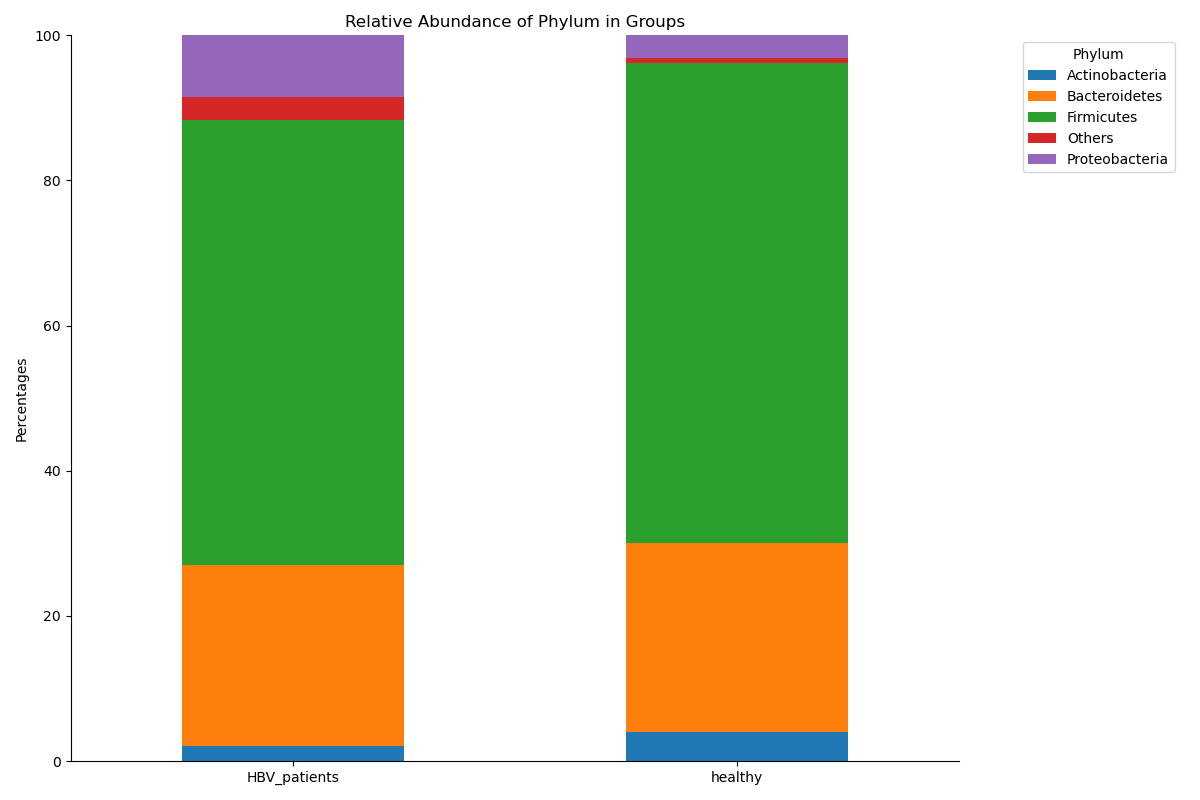

<IPython.core.display.Javascript object>


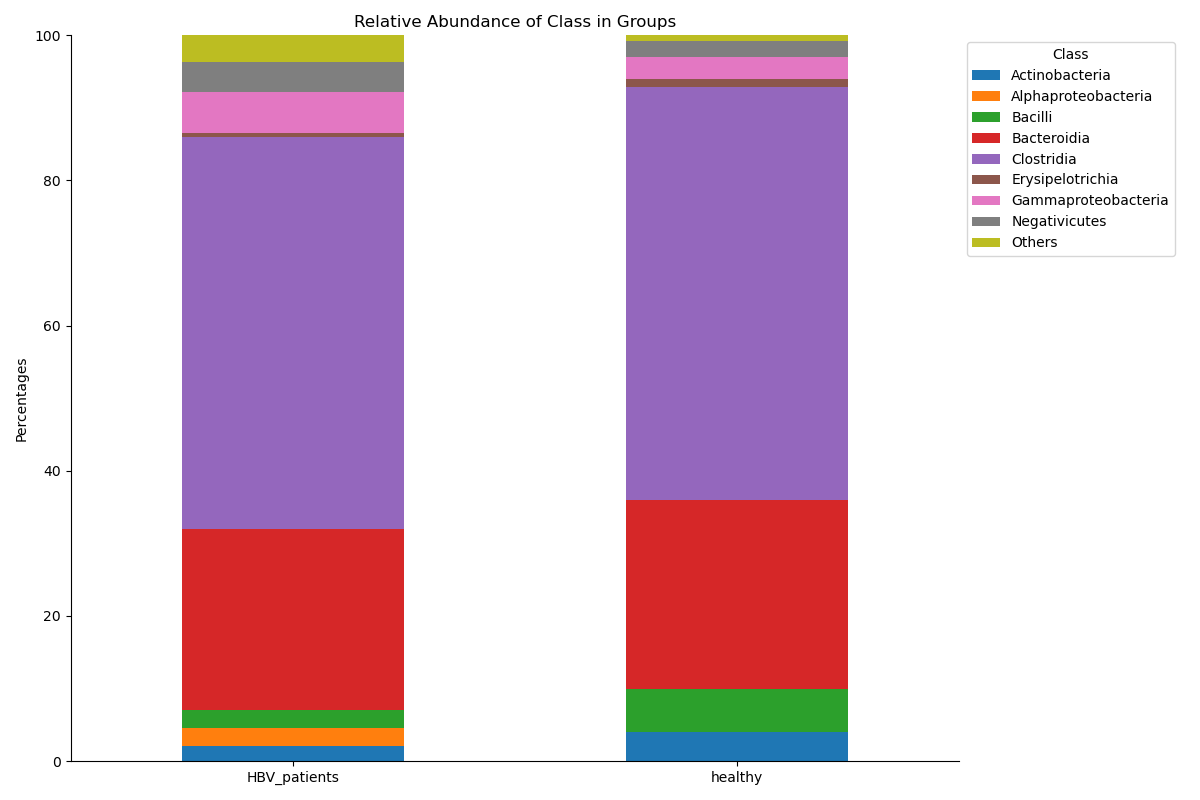

<IPython.core.display.Javascript object>


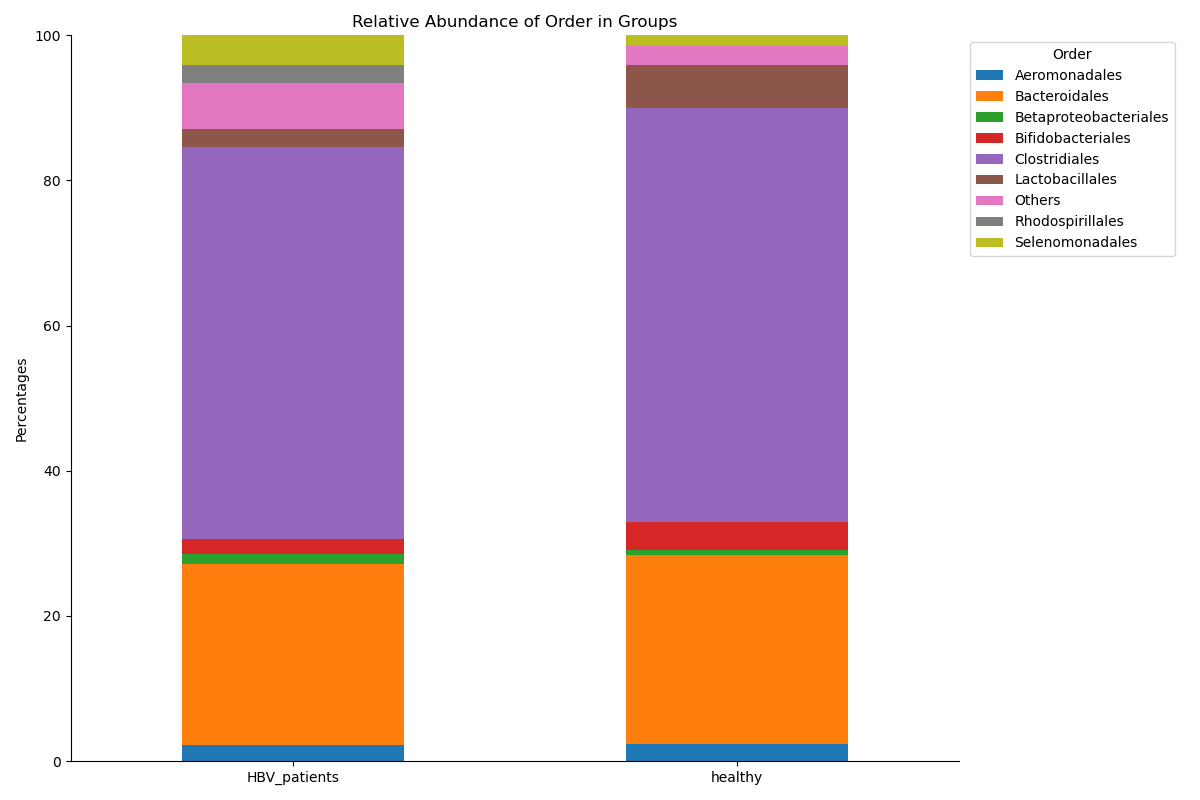

<IPython.core.display.Javascript object>


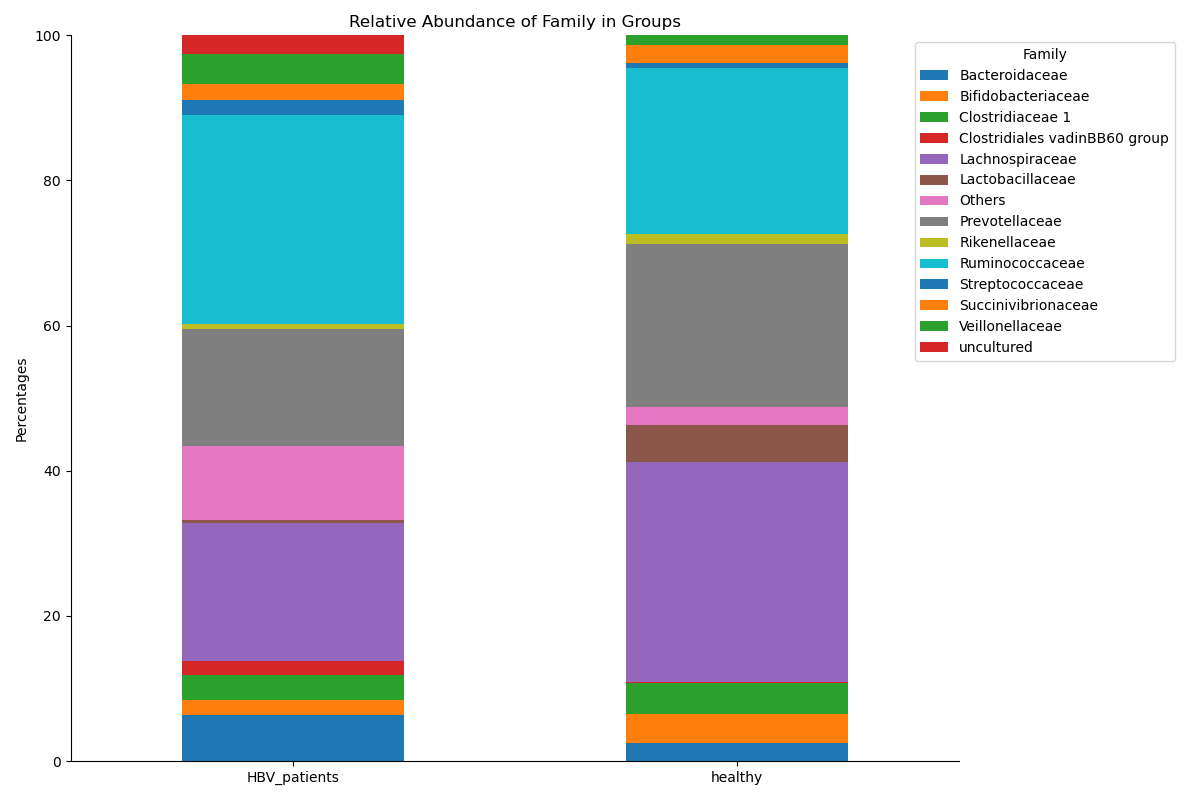

<IPython.core.display.Javascript object>


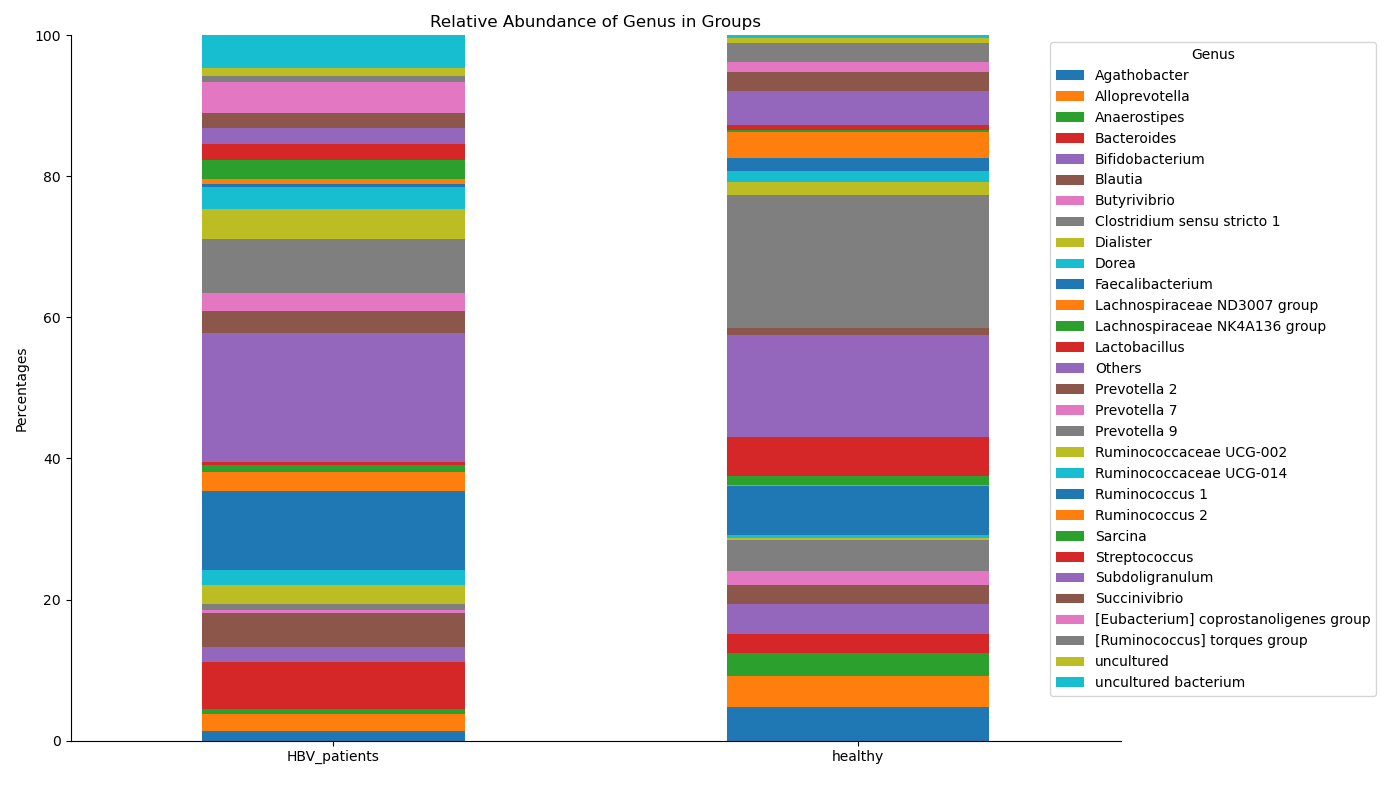

In [12]:
# Define the groups
groups = ['healthy', 'HBV_patients']

for level in level_names[1:-1]:
    # Group by Phylum and sum the counts for each group
    grouped_df = df.groupby(level)[groups].sum().reset_index()

    # Calculate percentages for each group
    grouped_df['healthy'] = (grouped_df['healthy'] / grouped_df['healthy'].sum()) * 100
    grouped_df['HBV_patients'] = (grouped_df['HBV_patients'] / grouped_df['HBV_patients'].sum()) * 100
    
    # Save percentage file
    grouped_df.round(2).to_csv(f"percentages/{level}_in_groups.csv", index=False)
    
    # Calculate the total counts for each level
    level_counts = grouped_df.groupby(level)[groups].sum().sum(axis=1)
    # Get the top 10 most abundant level
    top_phyla = level_counts.nlargest(getN[level]).index
    # Replace Phylum values with 'Others' for Phyla not in the top 10
    grouped_df[level] = np.where(grouped_df[level].isin(top_phyla), grouped_df[level], 'Others')
    # Group by the 'Phylum' column and sum the counts
    grouped_df = grouped_df.groupby(level).sum().reset_index()
    
    # Melt the DataFrame to long format for plotting
    melted_df = pd.melt(grouped_df, id_vars=[level], var_name='group', value_name='percentage')
    # Pivot the melted DataFrame to create a single stacked bar per group
    pivot_df = melted_df.pivot(index='group', columns=level, values='percentage').fillna(0)
    
    # Adjust figure size
    if level in ['Genus', 'Species']:
        figsize = (14, 8)
    else:
        figsize = (12, 8)
        
    # Plot the data for Groups
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=figsize)
    plt.title(f'Relative Abundance of {level} in Groups')
    plt.legend(title=level, loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.ylim(0, 100)
    plt.xticks(rotation=0)  # Keep x-axis tick labels
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    #plt.yticks([])  # Remove y-axis tick labels
    plt.xlabel('')
    plt.ylabel('Percentages')
    plt.tight_layout()
    # Save the figure to a file
    plt.savefig(f'images/{level}_in_groups.png', dpi=300, bbox_inches='tight')
    plt.show()

### Make Figures for Subgroups

<IPython.core.display.Javascript object>


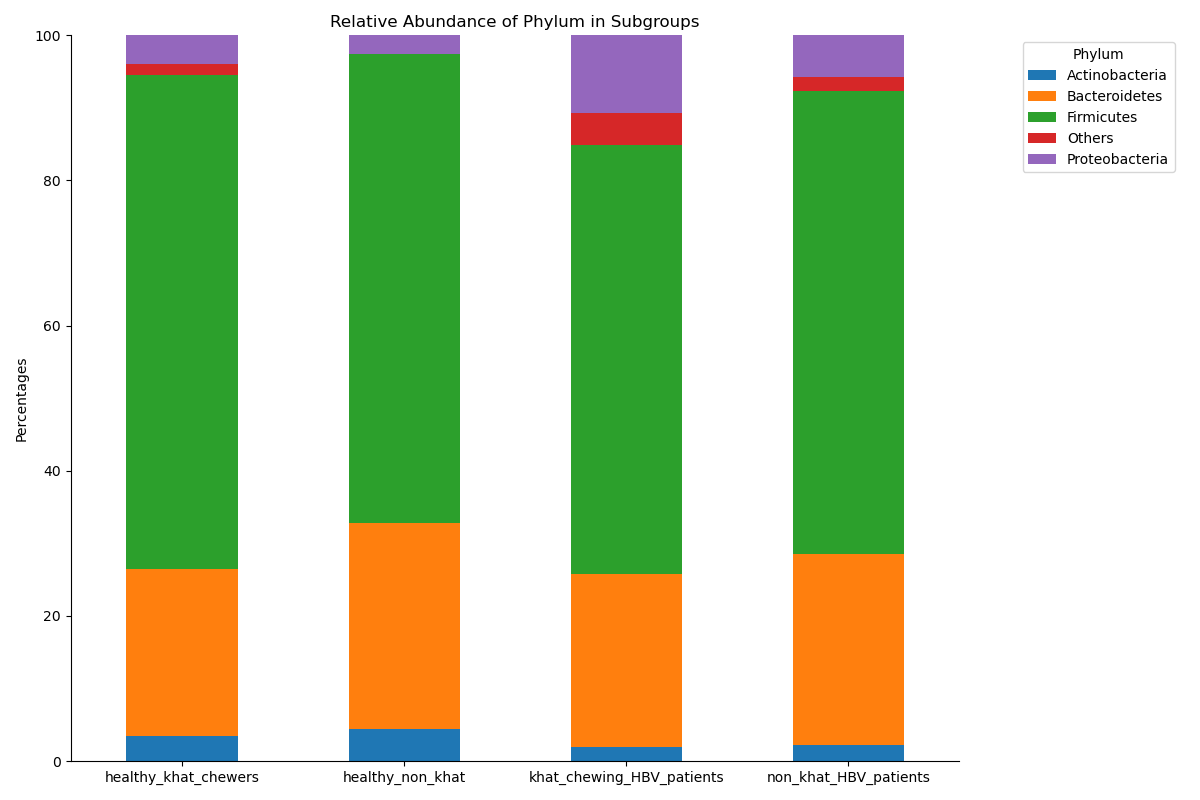

<IPython.core.display.Javascript object>


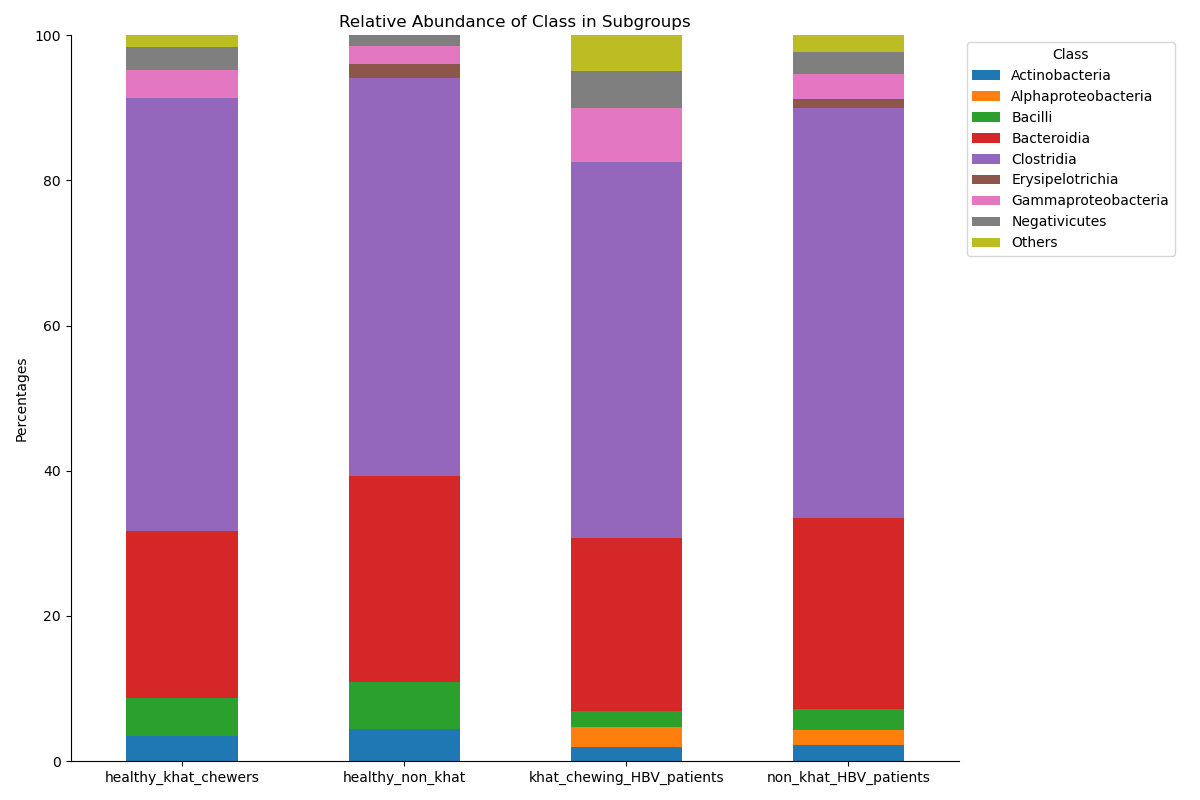

<IPython.core.display.Javascript object>


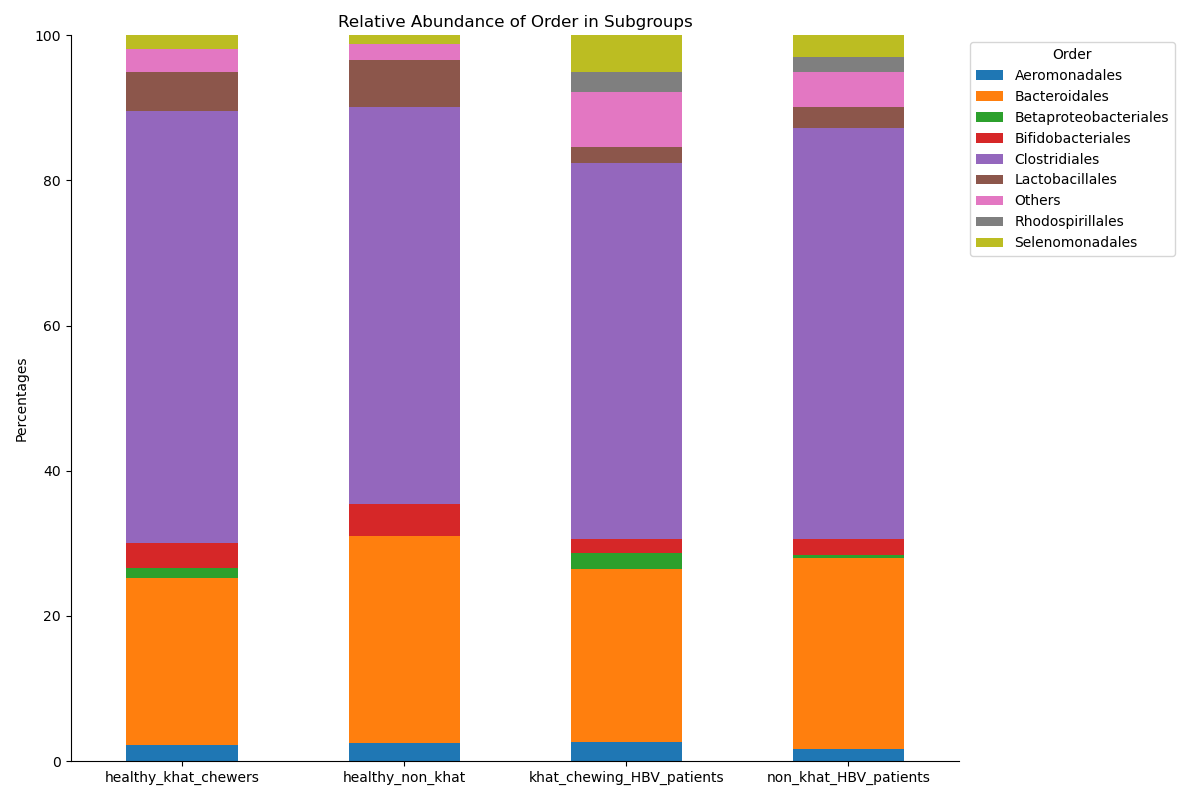

<IPython.core.display.Javascript object>


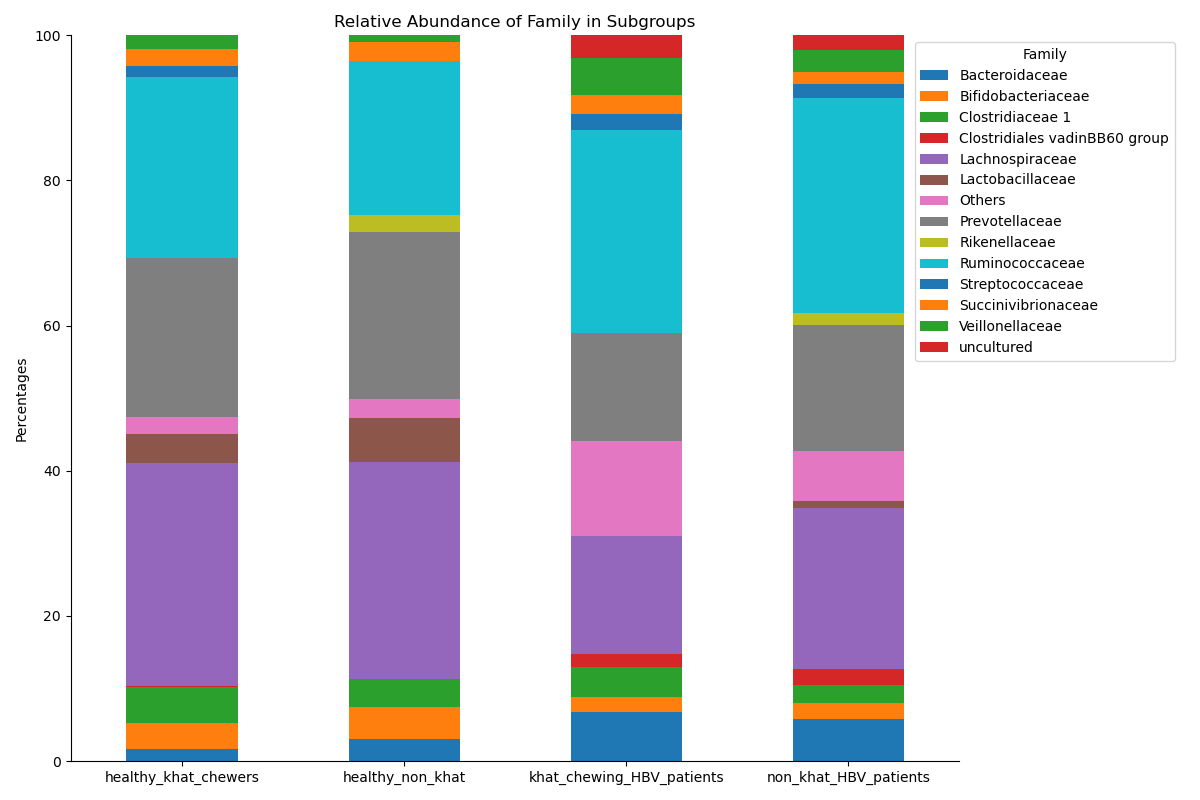

<IPython.core.display.Javascript object>


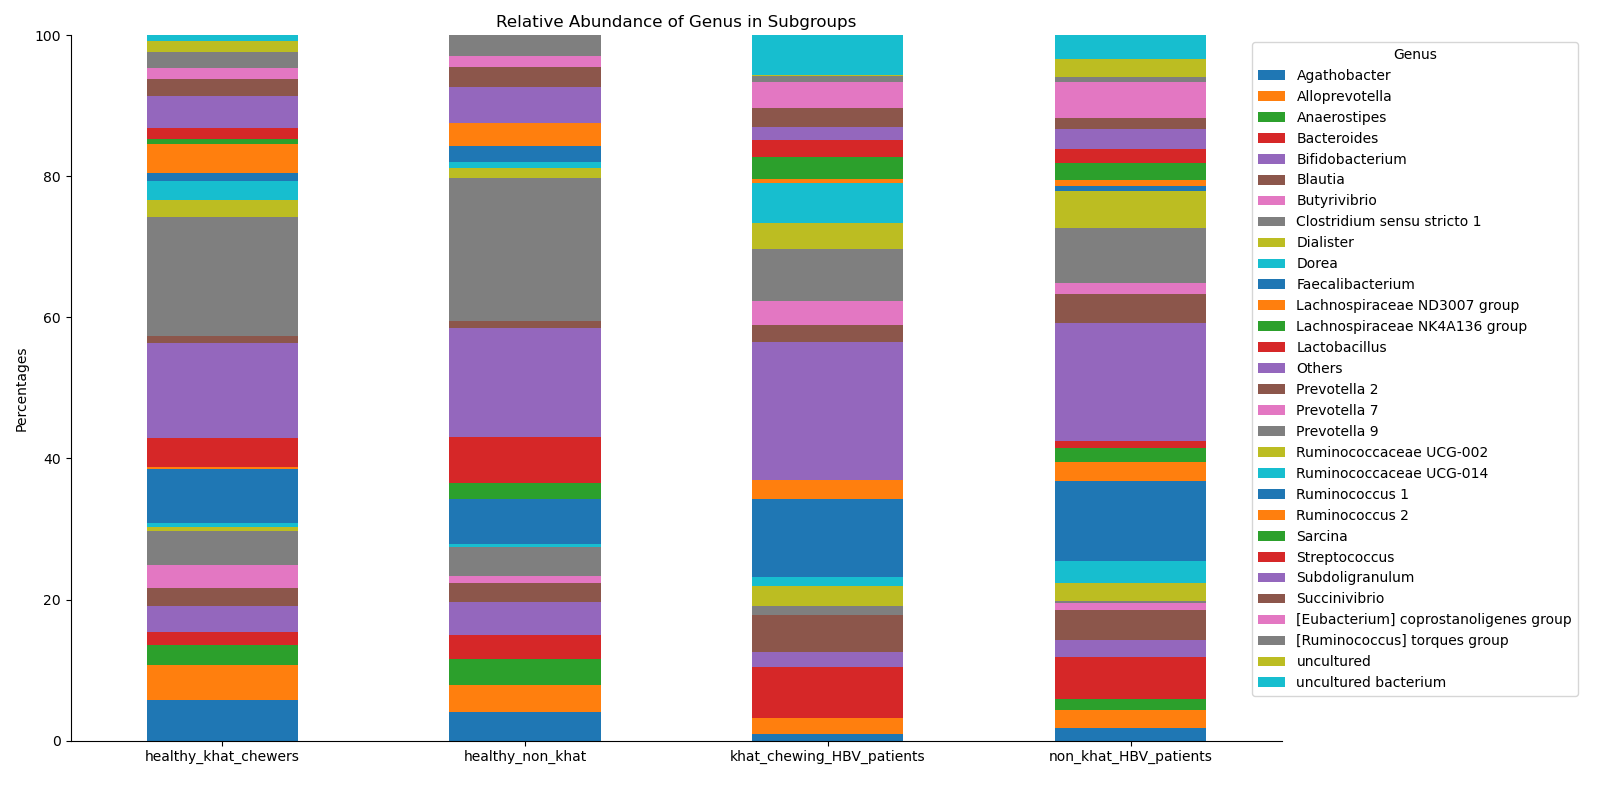

In [13]:
# Define the subgroups
subgroups = ['healthy_khat_chewers','healthy_non_khat','khat_chewing_HBV_patients','non_khat_HBV_patients']

for level in level_names[1:-1]:
    # Group by Phylum and sum the counts for each subgroup
    grouped_df = df.groupby(level)[subgroups].sum().reset_index()

    # Calculate percentages for each subgroup
    for subgroup in subgroups:
        grouped_df[subgroup] = (grouped_df[subgroup] / grouped_df[subgroup].sum()) * 100
        
    # Save percentage file
    grouped_df.round(2).to_csv(f"percentages/{level}_in_subgroups.csv", index=False)
    
    # Calculate the total counts for each level
    level_counts = grouped_df.groupby(level)[subgroups].sum().sum(axis=1)
    # Get the top 10 most abundant level
    top_phyla = level_counts.nlargest(getN[level]).index
    # Replace Phylum values with 'Others' for Phyla not in the top 10
    grouped_df[level] = np.where(grouped_df[level].isin(top_phyla), grouped_df[level], 'Others')
    # Group by the 'Phylum' column and sum the counts
    grouped_df = grouped_df.groupby(level).sum().reset_index()

    # Melt the DataFrame to long format for plotting
    melted_df = pd.melt(grouped_df, id_vars=[level], var_name='subgroup', value_name='percentage')

    # Pivot the melted DataFrame to create a single stacked bar for all subgroups
    pivot_df = melted_df.pivot(index='subgroup', columns=level, values='percentage').fillna(0)
    
    # Adjust figure size
    if level in ['Genus', 'Species']:
        figsize = (16, 8)
    else:
        figsize = (12, 8)
    
    # Plot the data for Subgroups
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=figsize)
    plt.title(f'Relative Abundance of {level} in Subgroups')
    plt.legend(title=level, loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.ylim(0, 100)
    plt.xticks(rotation=0)  # Keep x-axis tick labels
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    #plt.yticks([])  # Remove y-axis tick labels
    plt.xlabel('')
    plt.ylabel('Percentages')
    plt.tight_layout()
    # Save the figure to a file
    plt.savefig(f'images/{level}_in_subgroups.png', dpi=300, bbox_inches='tight')
    plt.show()